In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "../data/clean/boardgames_df_cleaned.csv"

boardgames = pd.read_csv(url)

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/1314617518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


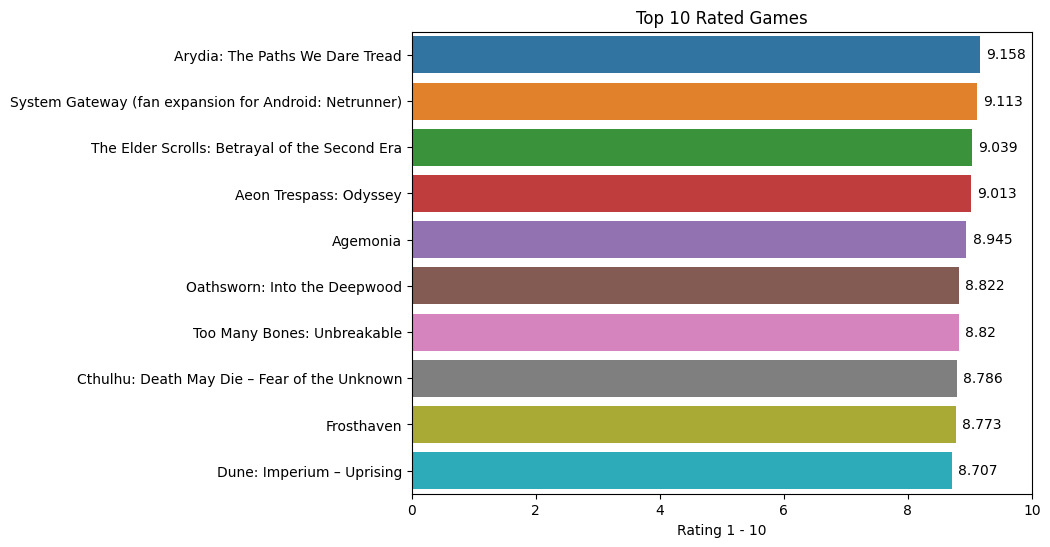

In [2]:
#Top 10 games by ranking

top10_ranking = boardgames[["boardgame", "avg_rating"]].nlargest(10, "avg_rating")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="avg_rating", y="boardgame", data=top10_ranking)

#color palette with 10 distinct colors
palette = sns.color_palette("tab10", n_colors=10)

ax = sns.barplot(
    x="avg_rating",
    y="boardgame",
    data=top10_ranking,
    palette=palette
)


#text labels
for i, v in enumerate(top10_ranking["avg_rating"]):
    ax.text(v + 0.1, i, str(v), color="black", va="center")
    
plt.xlim(0, 10)
plt.xlabel("Rating 1 - 10")
plt.ylabel("")
plt.title("Top 10 Rated Games")
plt.show()

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/2924562419.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


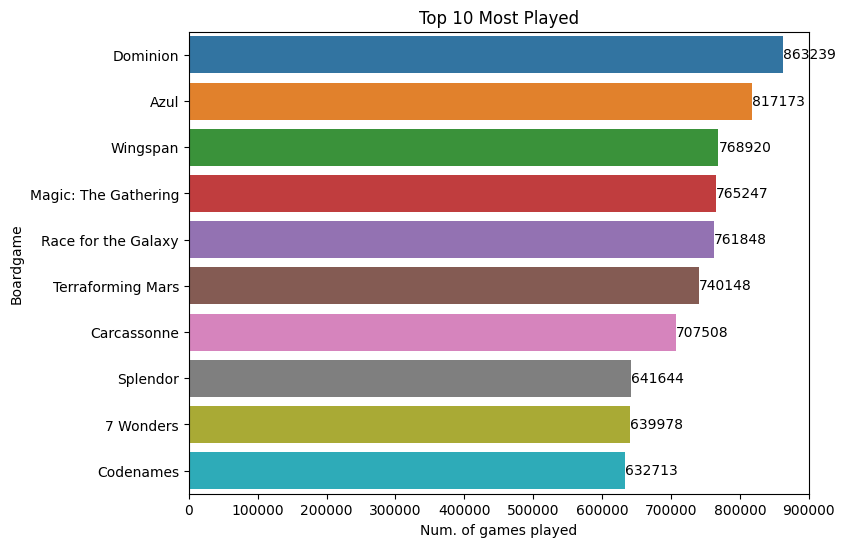

In [3]:
#top 10 overall most played

top10_overall = boardgames[["boardgame", "total_plays"]].nlargest(10, "total_plays")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="total_plays", y="boardgame", data=top10_overall)

#color palette with 10 distinct colors
palette = sns.color_palette("tab10", n_colors=10)

ax = sns.barplot(
    x="total_plays",
    y="boardgame",
    data=top10_overall,
    palette=palette
)


#text labels
for i, v in enumerate(top10_overall["total_plays"]):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.xlim(0, 900000)
plt.xlabel("Num. of games played")
plt.ylabel("Boardgame")
plt.title("Top 10 Most Played")
plt.show()

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/1571436426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


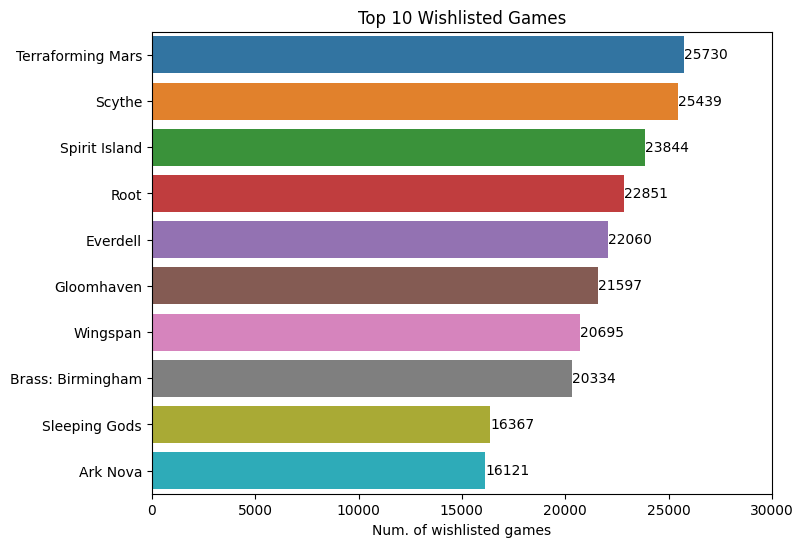

In [4]:
#top 10 wishlisted #

top10_wishlisted = boardgames[["boardgame", "wishlisted"]].nlargest(10, "wishlisted")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="wishlisted", y="boardgame", data=top10_wishlisted)

#color palette with 10 distinct colors
palette = sns.color_palette("tab10", n_colors=10)

ax = sns.barplot(
    x="wishlisted",
    y="boardgame",
    data=top10_wishlisted,
    palette=palette
)


#text labels
for i, v in enumerate(top10_wishlisted["wishlisted"]):
    ax.text(v + 0.5, i, str(v), color="black", va="center")
    
plt.xlim(0, 30000)
plt.xlabel("Num. of wishlisted games")
plt.ylabel("")
plt.title("Top 10 Wishlisted Games")
plt.show()